In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy.linalg as la

def tuples_to_dict(graph, N):
  graph_dict = {}
  for i in range(N):
    graph_dict[i] = []
  for edge in graph:
    graph_dict[edge[0]].append(edge[1])
  return graph_dict

def find_degrees(graph_dict, node_list):
  degs = []
  for i in node_list:
    degs.append(len(graph_dict[i]))
  return degs

def node_index(node, node_list):
  for index in range(len(node_list)):
    if (node_list[index] == node):
      return index

def graph_to_laplacian(graph_dict, node_list):
  # graph_dict = tuples_to_dict(graph, node_list)
  D = find_degrees(graph_dict, node_list)
  L = np.diag(D)
  for node in graph_dict:
      for neighbor in graph_dict[node]:
        L[node_index(node, node_list)][node_index(neighbor, node_list)] = -1
        L[node_index(neighbor, node_list)][node_index(node, node_list)] = -1
  return L

def graph_to_A(graph_dict, node_list):
  # graph_dict = tuples_to_dict(graph, node_list)
  N = len(graph_dict)
  A = np.zeros((N, N))
  for node in graph_dict:
      for neighbor in graph_dict[node]:
        A[node_index(node, node_list)][node_index(neighbor, node_list)] = 1
        A[node_index(neighbor, node_list)][node_index(node, node_list)] = 1
  return A

def calculate_M(node_list, N):
  M = np.zeros((N, N))
  for s in node_list:
    for t in node_list:
      if s != t:
        e_s = np.zeros(N)
        e_s[s] = 1
        e_t = np.zeros(N)
        e_t[t] = 1
        M += (e_s - e_t) @ (e_s - e_t).T
  return M

def dict_to_tuples(graph_dict):
  graph = []
  for u in graph_dict:
    for v in graph_dict[u]:
      graph.append([u,v])
  return graph

def effective_edge_resistance(graph_dict, N, edge_budget):
  edges_removed = 0
  node_list = [i for i in range(N)]
  M = calculate_M(node_list, N)
  while edges_removed < edge_budget:
    L = graph_to_laplacian(graph_dict, node_list)
    L_inv = np.linalg.pinv(L)
    edge_resistances = {}
    for u in graph_dict:
      e_u = np.zeros(N)
      e_u[u] = 1
      for v in graph_dict[u]:
        e_v = np.zeros(N)
        e_v[v] = 1
        edge_resistances[(u,v)] = (e_u - e_v).T @ L_inv @ M @ L_inv @ (e_u - e_v)
    # print(len(edge_resistances))
    removed_edge = max(edge_resistances, key=edge_resistances.get)
    graph_dict[removed_edge[0]].remove(removed_edge[1])
    graph_dict[removed_edge[1]].remove(removed_edge[0])
    edges_removed += 1
  
  return graph_dict

In [2]:
def percolation(neighbors_per_node, transmissionRate, recoveryRate):
    newGraph = []
    for node in neighbors_per_node:
        recoveryTime = np.random.exponential(1/recoveryRate)
        for neighbor in neighbors_per_node[node]:
            transmissionTime = np.random.exponential(1/transmissionRate)
            if (transmissionTime <= recoveryTime):
                newGraph.append([node, neighbor])
    return newGraph  

def find_connected_nodes(node, graph_dict, connected_component):
  if node not in connected_component:
    connected_component.append(node)
  for neighbor in graph_dict[node]:
    if neighbor not in connected_component:
      find_connected_nodes(neighbor, graph_dict, connected_component)

def find_entire_connection(infected_nodes, neighbors_per_node):
  connected_nodes = []
  for node in infected_nodes:
    find_connected_nodes(node, neighbors_per_node, connected_nodes)
  return connected_nodes

def calculateFinalInfection(graph_dict, N, numOfTrials, transmissionRate, recoveryRate):
  num_infected = []
  for i in range(numOfTrials):
    # print(i)
    graph = percolation(graph_dict, transmissionRate, recoveryRate)
    neighbors_per_node = tuples_to_dict(graph, N)
    infected_nodes = find_entire_connection(random.sample([i for i in range(0, N)], 1), neighbors_per_node)
    num_infected.append(len(infected_nodes))
  return np.mean(num_infected)

def erdos_renyi_graph(N, M):
  graph = []
  node_list = [i for i in range(N)]
  numEdges = 0
  while numEdges < M:
    edge = random.sample(node_list, 2)
    edge2 = [edge[1], edge[0]]
    if edge not in graph:
      numEdges += 1
      graph.append(edge)
      graph.append(edge2)
  return graph

def config_model2(deg_dist, n):
  node_list = np.arange(n)
  degreeOfNodes = {}
  for key in deg_dist:
    num_nodes = int(round(deg_dist[key]*n))
    nodes = node_list[:num_nodes]
    for node in nodes:
      degreeOfNodes[node] = key
    node_list = node_list[num_nodes:]
  sum_degs = 0
  for key in deg_dist:
    sum_degs += key*n*deg_dist[key]
  numedges = sum_degs/2
  half_edges = []
  for node in degreeOfNodes:
    deg = degreeOfNodes[node]
    for i in range(deg):
      half_edges.append(node)
  graph = []
  while half_edges != []:
    node1 = np.random.choice(half_edges)
    node2 = np.random.choice(half_edges)

    if (node1 != node2 and [node1, node2] not in graph):
      graph.append([node1, node2])
      graph.append([node2, node1])
      half_edges.remove(node1)
      half_edges.remove(node2)
  return graph

In [3]:
import heapq as hpq
import random
def random_edge_removal(graph, edge_budget):
  edges = random.sample(graph, edge_budget)
  # print (edges)
  all_edges = []
  for edge in edges:
    if edge not in all_edges:
      all_edges.append(edge)
      all_edges.append([edge[1], edge[0]])
    # if [edge[1], edge[0]] not in all_edges:
      # all_edges.append([edge[1], edge[0]])
  print (len(all_edges))
  new_graph = []
  for edge in graph:
    if edge not in all_edges:
      new_graph.append(edge)
  return new_graph

def tuples_to_dict(graph, N):
  graph_dict = {}
  for i in range(N):
    graph_dict[i] = []
  for edge in graph:
    graph_dict[edge[0]].append(edge[1])
  return graph_dict

# When I look into the toal degree of an edge from both side,
# and remove edges with the highest degree,
# this is not necessarily "proportional" I think
# it just cuts down the edges with extreme degrees
def highest_degree_edge_removal(graph_dict, edge_budget):
  degEdgeDict = {}
  for edge in graph:
    degEdgeDict[edge] = len(graph_dict[edge[0]]) + len(graph_dict[edge[0]]) - 2
  i = 0
  edges_to_remove = []
  while (i < edge_budget):
    edge1 = max(degEdgeDict, key=degEdgeDict.get)
    degEdgeDict[edge1] -= 1
    edge2 = [edge1[1], edge1[0]]
    degEdgeDict[edge2] -= 1
    edges_to_remove.append(edge1)
    edges_to_remove.append(edge2)
    i += 1
  new_graph = []
  for edge in graph:
    if edge != edges_to_remove:
      new_graph.append(edge)
  return tuples_to_dict(new_graph)

def dict_to_tuples(graph_dict):
  graph = []
  for u in graph_dict:
    for v in graph_dict[u]:
      graph.append([u,v])
  return graph

# the only way I could remove the edges was to remove half edges, because when I remove a full edge,
# that affects the degree proprotion of the other side too – I don't know how to do this
def degree_proportional_half_edge_removal(graph_dict, edge_budget):
  degDict = {}
  sum = 0
  for node in graph_dict:
    degDict[node] = len(graph_dict[node])
    sum += len(graph_dict[node])
  new_graph_dict = {}
  for node in graph_dict:
    # edge budget shoulbe multiplied by 2 to compensate for half edge removal
    num = round((degDict[node] / sum) * 2 * edge_budget) # gives the number of edges to remove from this node
    new_graph_dict[node] = random.sample(graph_dict[node], len(graph_dict[node]) - sum) 
    # len(graph_dict[node]) - sum is the number of remaning edges of this node after removal
  return new_graph_dict

def cut_size(A, left, right):
  size = np.sum(A[left].T[right])
  return size

# Makes single largest cut in graph (doesn't use full budget)
def biggest_cut_edge_removal(graph_dict, edge_budget):
  N = len(graph_dict)
  L = graph_to_laplacian(graph_dict, [i for i in range(N)])
  A = graph_to_A(graph_dict, [i for i in range(N)])
  results = la.eig(L)
  eigvalues = results[0]
  eigvectors = results[1]
  idx = eigvalues.argsort()[::-1]
  eigvectors = eigvectors[:,idx]  
  second_smallest_vec = eigvectors[:, -2]
  vec = second_smallest_vec.T
  ids = vec.argsort()[::-1]
  best_left = []
  best_right = [i for i in range(N)]
  best_cut = 0

  for i in range(int(N/2)):
    left = ids[:i]
    right = ids[i:]
    cut = cut_size(A, left, right)
    if cut > edge_budget:
      break
    best_cut = cut
    best_left = left
    best_right = right
  print("Cutting off %s nodes with %s edges out of %s" % (i, best_cut, edge_budget))

  new_graph = {}
  for i in range(N):
    new_graph[i] = []
    for edge_end in graph_dict[i]:
      if i in best_left and edge_end in best_left:
        new_graph[i].append(edge_end)
      elif i in best_right and edge_end in best_right:
        new_graph[i].append(edge_end)
  

  return new_graph, best_cut


def biggest_cut_edge_removal_recursive(graph_dict, edge_budget, node_list, components):
  N = len(graph_dict)
  L = graph_to_laplacian(graph_dict, node_list)
  A = graph_to_A(graph_dict, node_list)
  results = la.eig(L)
  eigvalues = results[0]
  eigvectors = results[1]
  idx = eigvalues.argsort()[::-1]
  eigvectors = eigvectors[:,idx]  
  second_smallest_vec = eigvectors[:, -2]
  vec = second_smallest_vec.T
  ids = vec.argsort()[::-1]
  best_left = []
  best_right = node_list
  best_cut = 0

  for i in range(int(N/2)):
    left = []
    for id in ids[:i]:
      left.append(node_list[id])
    right = []
    for id in ids[i:]:
      right.append(node_list[id])
    # print (left)
    # print (right)
    cut = cut_size(A, ids[:i], ids[i:])
    if cut > edge_budget:
      break
    best_cut = cut
    best_left = left
    best_right = right
  print("Cutting off %s nodes with %s edges out of %s" % (i, best_cut, edge_budget))

  left_graph = {}
  right_graph = {}
  for i in node_list:
    for edge_end in graph_dict[i]:
      if i in best_left and edge_end in best_left:
        if i not in left_graph:
          left_graph[i] = []
        left_graph[i].append(edge_end)
      elif i in best_right and edge_end in best_right:
        if i not in right_graph:
          right_graph[i] = []
        right_graph[i].append(edge_end)

  hpq.heappush(components, (-len(right_graph), random.random() , right_graph))
  
  hpq.heappush(components, (-len(left_graph), random.random(), left_graph))


  if edge_budget > best_cut and len(best_left) > 0:
    component = hpq.heappop(components)[2]
    c_nodes = []
    for node in component:
      c_nodes.append(node)
    new_component, best_cut1 = biggest_cut_edge_removal_recursive(component, edge_budget - best_cut, c_nodes, components)
  # print (graph_dict)
  new_graph = left_graph.copy()
  new_graph.update(right_graph)

  return new_graph, best_cut

def merge(components):
  first = hpq.heappop(components)
  new_graph = first[2]
  for component in components:
    new_graph.update(component[2])
  return new_graph


def biggest_cut_edge_removal_greedy(graph_dict, edge_budget):
  N = len(graph_dict)
  L = graph_to_laplacian(graph_dict, [i for i in range(N)])
  A = graph_to_A(graph_dict, [i for i in range(N)])
  results = la.eig(L)
  eigvalues = results[0]
  eigvectors = results[1]
  idx = eigvalues.argsort()[::-1]
  eigvectors = eigvectors[:,idx]  
  second_smallest_vec = eigvectors[:, -2]
  vec = second_smallest_vec.T
  ids = vec.argsort()[::-1]
  best_left = []
  best_right = [i for i in range(N)]
  best_cut = 0

  for i in range(int(N/2)):
    left = ids[:i]
    right = ids[i:]
    cut = cut_size(A, left, right)
    if cut > edge_budget:
      break
    best_cut = cut
    best_left = left
    best_right = right
  print("Cutting off %s nodes with %s edges out of %s" % (i, best_cut, edge_budget))

  new_graph = {}
  for i in range(N):
    new_graph[i] = []
    for edge_end in graph_dict[i]:
      if i in best_left and edge_end in best_left:
        new_graph[i].append(edge_end)
      elif i in best_right and edge_end in best_right:
        new_graph[i].append(edge_end)
  # print (new_graph)
  if edge_budget > best_cut:
    new_graph = effective_edge_resistance(new_graph, N, edge_budget - best_cut)


  return new_graph, best_cut

In [6]:

def find_num_connections(graph_dict, N):
      node_list = [i for i in range(N)]
      num = 0
      while node_list != []:
            node = node_list[0]
            connected_component = []
            find_connected_nodes(node, graph_dict, connected_component)
            con = len(connected_component)
            num += con*(con - 1)/2
            for node in connected_component:
                  node_list.remove(node)
      return num 

In [7]:
N = 100
M = 400
graph = erdos_renyi_graph(N, M)
node_list = [i for i in range(N)]

graph_dict1 = tuples_to_dict(graph, N)
graph_dict4 = tuples_to_dict(graph, N)
graph_dict5 = tuples_to_dict(graph, N)
original_graph = tuples_to_dict(graph, N)
budgets = []
numOfTrials = 200
transmissionRate = 0.9
recoveryRate = 0.1
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []

increment = 10
for i in range(1,40):
  print (i)
  budgets.append(increment*i)
  graph_dict1 = effective_edge_resistance(graph_dict1, N, increment)
  Y1.append(find_num_connections(graph_dict1, N))
  print(Y1)
  graph = random_edge_removal(graph, increment)
  graph_dict_random = tuples_to_dict(graph, N)
  Y2.append(find_num_connections(graph_dict_random, N))
  node_list = list(original_graph.keys())
  graph_dict_cut = biggest_cut_edge_removal_greedy(original_graph, budgets[-1])[0]
  Y3.append(find_num_connections(graph_dict_cut, N))


1
[4851.0]
20
Cutting off 3 nodes with 8.0 edges out of 10
2
[4851.0, 4753.0]
20
Cutting off 5 nodes with 19.0 edges out of 20
3
[4851.0, 4753.0, 4656.0]
20
Cutting off 6 nodes with 24.0 edges out of 30
4
[4851.0, 4753.0, 4656.0, 4656.0]
20
Cutting off 8 nodes with 39.0 edges out of 40
5
[4851.0, 4753.0, 4656.0, 4656.0, 4465.0]
20
Cutting off 11 nodes with 48.0 edges out of 50
6
[4851.0, 4753.0, 4656.0, 4656.0, 4465.0, 4186.0]
20
Cutting off 13 nodes with 58.0 edges out of 60
7
[4851.0, 4753.0, 4656.0, 4656.0, 4465.0, 4186.0, 4186.0]
20
Cutting off 17 nodes with 69.0 edges out of 70
8
[4851.0, 4753.0, 4656.0, 4656.0, 4465.0, 4186.0, 4186.0, 4005.0]
20
Cutting off 20 nodes with 80.0 edges out of 80
9
[4851.0, 4753.0, 4656.0, 4656.0, 4465.0, 4186.0, 4186.0, 4005.0, 3741.0]
20
Cutting off 26 nodes with 89.0 edges out of 90
10
[4851.0, 4753.0, 4656.0, 4656.0, 4465.0, 4186.0, 4186.0, 4005.0, 3741.0, 3570.0]
20
Cutting off 29 nodes with 99.0 edges out of 100
11
[4851.0, 4753.0, 4656.0, 4656.

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[122, 162, 191, 208, 218, 337, 358, 335, 272, 332, 345, 360, 336, 362, 354, 301, 364, 366, 337, 363, 366, 362, 361, 350, 352, 364, 371, 370, 370, 364, 358, 367, 362, 376, 367, 371, 371, 365, 369, 368, 368, 375, 370, 374, 370, 370, 369, 374, 367, 360, 364, 362, 366, 362, 340, 373, 362, 360, 369, 357, 367, 364, 362, 370, 359, 361, 335, 368, 367, 368, 370, 321, 342, 364, 347, 350, 348, 361, 350, 363, 365, 369, 365, 369, 372, 365, 371, 359, 364, 361, 330, 373, 357, 374, 346, 374, 364, 362]
[2451.0, 1617.0, 1200.0, 950.0, 784.0, 665.0, 576.0, 506.0, 450.0, 405.0, 368.0, 336.0, 308.0, 285.0, 264.0, 245.0, 230.0, 215.0, 200.0, 190.0, 180.0, 170.0, 160.0, 150.0, 150.0, 138.0, 138.0, 132.0, 126.0, 114.0, 108.0, 12

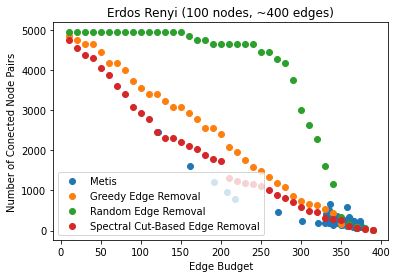

In [11]:
import networkx as nx
import metis
import numpy as np
import random
import matplotlib.pyplot as plt
import math


G = nx.erdos_renyi_graph(100, 0.0808080808, seed=None, directed=False)
component_list = list(nx.connected_components(G))
metisG = metis.networkx_to_metis(G)
max_budget = 400
partition = 2
edgecuts = 0
edgecut_budget = []
Y_metis = []
Y_metis1 =[]
while (edgecuts < max_budget and partition < 100):
  (edgecuts, parts) = metis.part_graph(metisG, partition)
  if (edgecuts < max_budget):
    print(partition)
    edgecut_budget.append(edgecuts)
    connected_pairs = 0
    for component in component_list:
          cluster_sizes = {}
          for num in component:     
                if parts[num] not in cluster_sizes:
                  cluster_sizes[parts[num]] = []
                cluster_sizes[parts[num]].append(num)
          for size in cluster_sizes:
                con = len(cluster_sizes[size])
                connected_pairs += (con*(con-1))/2
    Y_metis.append(connected_pairs)     
    cluster_sizes1 = {}
    for num in parts:
      if num not in cluster_sizes1:
        cluster_sizes1[num] = 0
      cluster_sizes1[num] += 1
    max = 0
    for num in cluster_sizes1:
      if cluster_sizes1[num] > max:
        max = cluster_sizes1[num]
    Y_metis1.append(max)
  partition += 1
    
# plt.plot(budgets, Y, label="Spectral Cut-Based Edge Removal")
print(edgecut_budget)
print(Y_metis)
plt.scatter(edgecut_budget, Y_metis, label="Metis")
# plt.scatter(edgecut_budget, Y_metis1, label="Size of the Biggest Cluster")
plt.scatter(budgets, Y1, label="Greedy Edge Removal")
plt.scatter(budgets, Y2, label="Random Edge Removal")
plt.scatter(budgets, Y3, label="Spectral Cut-Based Edge Removal")
# plt.plot(budgets, Y4, label="Degree Proportional Half Edge Removal")
# plt.plot(budgets, Y5, label="Highest Edge Degree Removal")
plt.xlabel("Edge Budget")
plt.ylabel("Number of Conected Node Pairs")
plt.title("Erdos Renyi (100 nodes, ~400 edges)")
plt.legend()
